### Importing Required Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Acquiring data

**Download the Assets From Following Link:-** https://www.kaggle.com/arpitjain007/game-of-deep-learning-ship-datasets

### Loading and Pre Processing the Data

In [2]:
train_labels = pd.read_csv('/Users/Asus/Documents/Atmel Studio/DeepLearn/train.csv')
train_labels['category'] = train_labels['category'] - 1
train_labels.head()

,image,category
0,2823080.jpg,0
1,2870024.jpg,0
2,2662125.jpg,1
3,2900420.jpg,2
4,2804883.jpg,1


In [12]:
X = []
y = []
path = "/Users/Asus/Documents/Atmel Studio/DeepLearn/images/"
img_shape = 64
for i in train_labels.iterrows() :
    img_path = os.path.join(path, i[1]['image'])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_shape,img_shape), interpolation='lanczos')
    img = tf.keras.preprocessing.image.img_to_array(img)
    X.append(img)
    y.append(float(i[1]['category']))
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape

((6252, 64, 64, 3), (6252,))

In [13]:
X = X / 255.0

### Viewing Sample Images from the Dataset

Text(0.5, 1.0, '4.0')

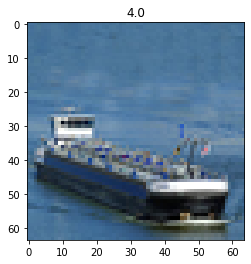

In [14]:
plt.imshow(X[1000])
plt.title(y[1000])

### Creating a Deep Learning model using Keras

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((img_shape,img_shape,3)),
    tf.keras.applications.MobileNet(include_top=False, weights='imagenet'),
    tf.keras.layers.Conv2D(3, 3, padding='same', activation='sigmoid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 3)           27651     
_________________________________________________________________
flatten_1 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 65        
Total params: 3,256,580
Trainable params: 3,234,692
Non-trainable params: 21,888
_________________________________________________________________


### Training the Deep Learning Model

In [16]:
model.fit(X, y, epochs=50, batch_size=128, validation_split=0.25, shuffle=True)

Epoch 1/50
37/37 [==============================] - 24s 473ms/step - loss: 1.3852 - accuracy: 0.4297 - val_loss: 1.3374 - val_accuracy: 0.4165
Epoch 2/50
37/37 [==============================] - 15s 403ms/step - loss: 1.0171 - accuracy: 0.7379 - val_loss: 1.1477 - val_accuracy: 0.5662
Epoch 3/50
37/37 [==============================] - 16s 422ms/step - loss: 0.8445 - accuracy: 0.8546 - val_loss: 1.0531 - val_accuracy: 0.6481
Epoch 4/50
37/37 [==============================] - 16s 428ms/step - loss: 0.7272 - accuracy: 0.9226 - val_loss: 0.9674 - val_accuracy: 0.7012
Epoch 5/50
37/37 [==============================] - 16s 427ms/step - loss: 0.6430 - accuracy: 0.9605 - val_loss: 0.9329 - val_accuracy: 0.7268
Epoch 6/50
37/37 [==============================] - 16s 427ms/step - loss: 0.5819 - accuracy: 0.9812 - val_loss: 0.9116 - val_accuracy: 0.7345
Epoch 7/50
37/37 [==============================] - 16s 428ms/step - loss: 0.5391 - accuracy: 0.9910 - val_loss: 0.8867 - val_accuracy: 0.7518

### Evaluating the model on whole dataset

In [17]:
model.evaluate(X,y)

196/196 [==============================] - 9s 42ms/step - loss: 0.3319 - accuracy: 0.9488


[0.3318767547607422, 0.9488163590431213]

### Defining labels for prediction

In [18]:
labels_inv = {'Cargo': 0,
              'Military': 1,
              'Carrier': 2,
              'Cruise': 3,
              'Tankers': 4}
labels = {v:k for k,v in labels_inv.items()}
labels

{0: 'Cargo', 1: 'Military', 2: 'Carrier', 3: 'Cruise', 4: 'Tankers'}

### Helper Function for Prediction

In [19]:
def predict(path) :
    img = tf.keras.preprocessing.image.load_img(path, target_size=(img_shape,img_shape), interpolation='lanczos')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    pred = model.predict(np.array([img]))
    plt.imshow(img)
    pred_label = np.argsort(pred)
    for i in pred_label[0][-1:-3:-1] :
        print(f"{labels[i]} Ship : {pred[0][i]*100:0.2f} %")

### Testing the model on various data obtained from Intrnet

In [25]:
import requests

In [28]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg/1200px-MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg'
doc = requests.get(url)
with open('1200px-MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg', 'wb') as f:
    f.write(doc.content)



#!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg/1200px-MAERSK_MC_KINNEY_M%C3%96LLER_%26_MARSEILLE_MAERSK_%2848694054418%29.jpg

Cargo Ship : 84.67 %
Military Ship : 5.19 %


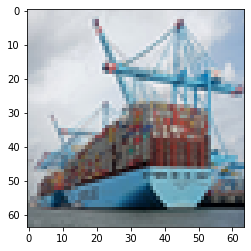

In [33]:
predict("/Users/Asus/Documents/Atmel Studio/DeepLearn/predict image/1200px-MAERSK_MC_KINNEY_MÖLLER_&_MARSEILLE_MAERSK_(48694054418).jpg") # Cargo Ship Example from Internet

In [34]:
url = 'https://media.architecturaldigest.com/photos/593829315838160353567328/master/pass/mscworldclass.jpg'
doc = requests.get(url)
with open('mscworldclass.jpg', 'wb') as f:
    f.write(doc.content)


#!wget https://media.architecturaldigest.com/photos/593829315838160353567328/master/pass/mscworldclass.jpg

Cruise Ship : 70.95 %
Military Ship : 11.27 %


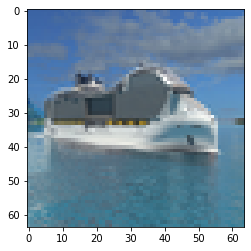

In [36]:
predict('/Users/Asus/Documents/Atmel Studio/DeepLearn/predict image/mscworldclass.jpg') # Cruise Ship Example from Internet

In [ ]:
#!wget https://www.dnv.com/Images/KP_Tan_269_Tanker_vessel_tcm71-192023.jpg

Tankers Ship : 45.08 %
Cargo Ship : 35.38 %


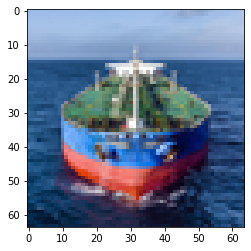

In [39]:
predict("/Users/Asus/Documents/Atmel Studio/DeepLearn/predict image/KP_Tan_269_Tanker_vessel_tcm71-192023.jpg") # Tanker Ship Example from Internet

In [ ]:
#!wget https://images02.military.com/sites/default/files/2020-02/uss-independence-eastern-pacific-1800.jpg

Military Ship : 56.46 %
Cargo Ship : 16.74 %


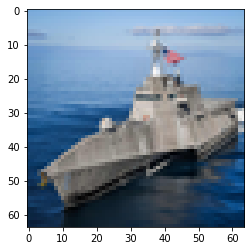

In [40]:
predict("/Users/Asus/Documents/Atmel Studio/DeepLearn/predict image/uss-independence-eastern-pacific-1800.jpg")

In [ ]:
#!wget https://cdn.britannica.com/34/94834-050-16DB7EEB/USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg

Military Ship : 42.87 %
Cruise Ship : 32.23 %


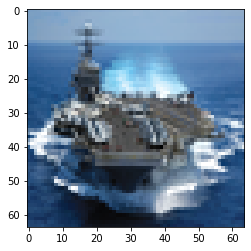

In [42]:
predict("/Users/Asus/Documents/Atmel Studio/DeepLearn/predict image/USS-Carl-Vinson-aircraft-carrier-US-Navy-2005.jpg")

In [ ]:
#!wget https://chantiers-atlantique.com/wp-content/uploads/2021/05/Page-Activite%CC%81s-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg

Military Ship : 44.88 %
Cargo Ship : 27.90 %


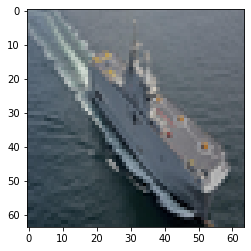

In [43]:
predict("/Users/Asus/Documents/Atmel Studio/DeepLearn/predict image/Page-Activités-BPC-N33-G-A-NASSER-25-5-1-min-1980x840.jpg")

In [ ]:
#!wget https://img.theweek.in/content/dam/week/news/india/images/2020/2/19/kavaratti-grse.jpg

Cargo Ship : 43.03 %
Cruise Ship : 28.79 %


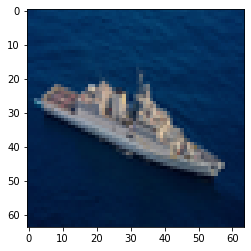

In [44]:
predict("/Users/Asus/Documents/Atmel Studio/DeepLearn/predict image/kavaratti-grse.jpg")

In [ ]:
#!wget https://upload.wikimedia.org/wikipedia/commons/7/75/INS_Mumbai_%28D62%29_underway.jpg

Military Ship : 79.63 %
Cargo Ship : 7.31 %


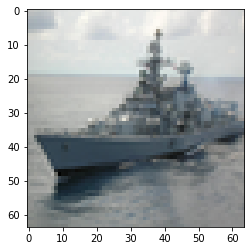

In [45]:
predict("/Users/Asus/Documents/Atmel Studio/DeepLearn/predict image/INS_Mumbai_(D62)_underway.jpg")

In [ ]:
#!wget https://www.theenterpriseworld.com/wp-content/uploads/2021/03/suez-canal-ship-stuck.jpg

Cargo Ship : 84.69 %
Military Ship : 5.20 %


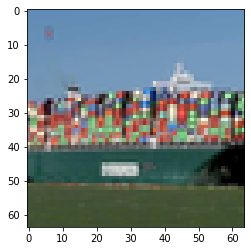

In [46]:
predict("/Users/Asus/Documents/Atmel Studio/DeepLearn/predict image/suez-canal-ship-stuck.jpg")